### Product Portfolio Management (PPM) analysis and Bubble chart   

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Parameters

In [2]:
csv_in = 'ppm.csv'

### Read CSV file

In [3]:
df = pd.read_csv(csv_in, sep=',', skiprows=3, header=0)
print(df.shape)
print(df.info())
display(df.head())

(4, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Field             4 non-null      object 
 1   Sales(BY)         4 non-null      float64
 2   Share(%)          4 non-null      float64
 3   Top/2nd_Share(%)  4 non-null      float64
 4   Growth_Ratio(%)   4 non-null      float64
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes
None


,Field,Sales(BY),Share(%),Top/2nd_Share(%),Growth_Ratio(%)
0,Convenient_Store,4678.0,36.8,28.2,2.5
1,E-commerce,108.8,2.1,27.6,9.0
2,Department_Store,674.4,11.4,16.6,-1.1
3,Bank,127.7,0.7,23.6,0.3


### Calculation of relative share  
相対シェアの計算  

In [4]:
df['relative_share'] = df['Share(%)'] / df['Top/2nd_Share(%)']

### Calculation of relative sales  
相対売上高の計算  

In [5]:
df['relative_sales'] = df['Sales(BY)'] / df['Sales(BY)'].max()

### Calculation of radius  
Determine the radius so that the area ratio of the circle matches the relative sales.    
(i.e., the square root of relative sales is the radius of the circle.)  
円の面積比が相対売上高と一致するように半径を決める  
(つまり相対売上高の平方根を円の半径とする)  

In [6]:
df['radius'] = np.sqrt(df['relative_sales']) * 2000.0

### Bubble chart  

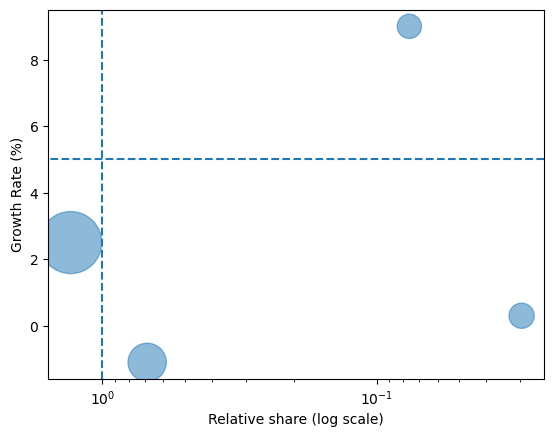

In [7]:
plt.scatter(df['relative_share'], df['Growth_Ratio(%)'], s=df['radius'], alpha=0.5)
plt.xlabel('Relative share (log scale)')
plt.ylabel('Growth Rate (%)')
plt.xscale('log')
(xmin,xmax,ymin,ymax) = plt.axis()
plt.xlim(xmax, xmin)
plt.ylim(ymin, ymax)
plt.hlines([5], xmin, xmax, linestyle='dashed')
plt.vlines([1], ymin, ymax, linestyle='dashed')
plt.show()